## Imports

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Reading Data

In [2]:
df = pd.read_csv("FuelConsumptionCo2.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


### Selecting Some Features

In [3]:
cdf = df[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_CITY", "FUELCONSUMPTION_HWY", "FUELCONSUMPTION_COMB", "CO2EMISSIONS"]]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244


## Scatter Plots

Text(0, 0.5, 'Emission')

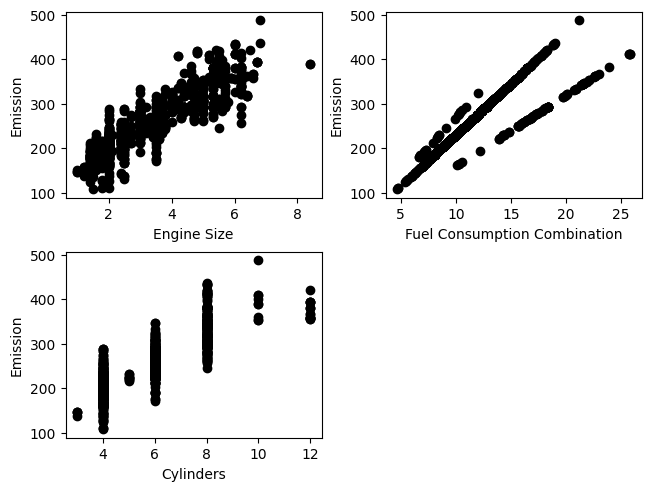

In [4]:
figure, axes = plt.subplots(2, 2, constrained_layout=True)
axes[1, 1].set_visible(False)

axes[0, 0].scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color="black")
axes[0, 0].set_xlabel("Engine Size")
axes[0, 0].set_ylabel("Emission")

axes[0, 1].scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color="black")
axes[0, 1].set_xlabel("Fuel Consumption Combination")
axes[0, 1].set_ylabel("Emission")

axes[1, 0].scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color="black")
axes[1, 0].set_xlabel("Cylinders")
axes[1, 0].set_ylabel("Emission")

## Masking

In [5]:
mask = np.random.rand(len(df)) < 0.8
train_data = cdf[mask]
test_data = cdf[~mask]

## Modeling (Regression)

In [6]:
from sklearn import linear_model

reg = linear_model.LinearRegression()

train_x = np.asanyarray(train_data[["ENGINESIZE", "FUELCONSUMPTION_CITY", "CYLINDERS"]])
train_y = np.asanyarray(train_data[["CO2EMISSIONS"]])

reg.fit(train_x, train_y)

print(f"Emission = {reg.intercept_[0]} + ({reg.coef_[0][0]} * Engin_Size) + ({reg.coef_[0][1]} * Fuel_Consumption) + ({reg.coef_[0][2]} * Cylinders)")

Emission = 69.9564529825779 + (11.278935489392248 * Engin_Size) + (8.482514918105759 * Fuel_Consumption) + (6.140564822239464 * Cylinders)


## Prediction (Test)

In [7]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test_data[["ENGINESIZE", "FUELCONSUMPTION_CITY", "CYLINDERS"]])
test_y = np.asanyarray(test_data[["CO2EMISSIONS"]])

predicted_y = reg.predict(test_x)

print(f"Residual Sum of Squares: {np.mean((predicted_y - test_y) ** 2)}")
print(f"R2-Score (between 0 and 1, 1 is ideal): {r2_score(test_y, predicted_y)}")
print(f"R-Score (between 0 and 1, 1 is ideal): {reg.score(test_x, test_y)}")

Residual Sum of Squares: 570.9632765876638
R2-Score (between 0 and 1, 1 is ideal): 0.8545755732714445
R-Score (between 0 and 1, 1 is ideal): 0.8545755732714445


## Plots

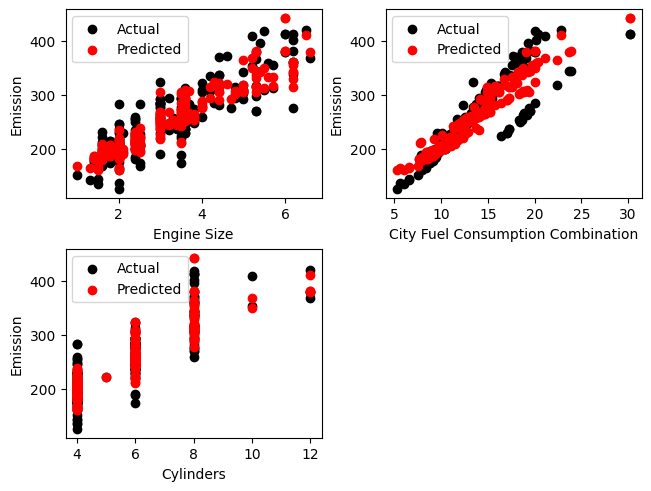

In [8]:
predictedEmission = reg.predict(test_x)

figure, axes = plt.subplots(2, 2, constrained_layout=True)
axes[1, 1].set_visible(False)

axes[0, 0].scatter(test_data.ENGINESIZE, test_y, color="black", label="Actual")
axes[0, 0].scatter(test_data.ENGINESIZE, predictedEmission, color="red", label="Predicted")
axes[0, 0].set_xlabel("Engine Size")
axes[0, 0].set_ylabel("Emission")
axes[0, 0].legend()

axes[0, 1].scatter(test_data.FUELCONSUMPTION_CITY, test_y, color="black", label="Actual")
axes[0, 1].scatter(test_data.FUELCONSUMPTION_CITY, predictedEmission, color="red", label="Predicted")
axes[0, 1].set_xlabel("City Fuel Consumption Combination")
axes[0, 1].set_ylabel("Emission")
axes[0, 1].legend()

axes[1, 0].scatter(test_data.CYLINDERS, test_y, color="black", label="Actual")
axes[1, 0].scatter(test_data.CYLINDERS, predictedEmission, color="red", label="Predicted")
axes[1, 0].set_xlabel("Cylinders")
axes[1, 0].set_ylabel("Emission")
axes[1, 0].legend()